In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Covid Predesposition/covid.csv')

In [3]:
pd.set_option('display.max_columns',None)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [4]:
df.shape

(566602, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [6]:
df.dtypes

id                     object
sex                     int64
patient_type            int64
entry_date             object
date_symptoms          object
date_died              object
intubed                 int64
pneumonia               int64
age                     int64
pregnancy               int64
diabetes                int64
copd                    int64
asthma                  int64
inmsupr                 int64
hypertension            int64
other_disease           int64
cardiovascular          int64
obesity                 int64
renal_chronic           int64
tobacco                 int64
contact_other_covid     int64
covid_res               int64
icu                     int64
dtype: object

## Descriptives, Feature Engineering and Visualizations

In this section we manipulate the dataframe to get a better understanding of the data.

In [7]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [8]:
df = df.rename(columns = {'patient_type':'outpatient'})
# makes column easier to understand

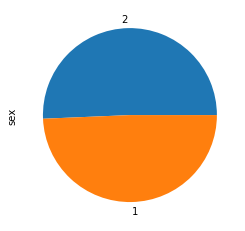

In [9]:
df.sex.value_counts().plot.pie()
# We can see an almost equal distribution of male and females in the dataset

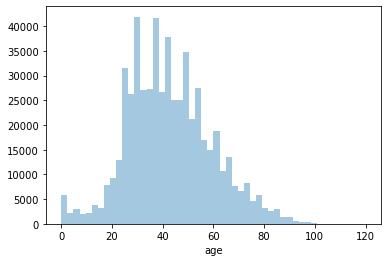

In [24]:
sns.distplot(df.age, kde=False)
# Here we can see a distribution of age centering around 40 years.

In [25]:
df.age.mean()
# just to confirm

42.62248280097847

In [10]:
# change the the dates column to datetime type 
df.entry_date = pd.to_datetime(df.entry_date, dayfirst=True)
df.date_symptoms = pd.to_datetime(df.date_symptoms, dayfirst=True)
df.head()

,id,sex,outpatient,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-05-04,2020-05-02,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,2020-03-19,2020-03-17,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,2020-04-06,2020-04-01,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,2020-04-17,2020-04-10,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,2020-04-13,2020-04-13,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


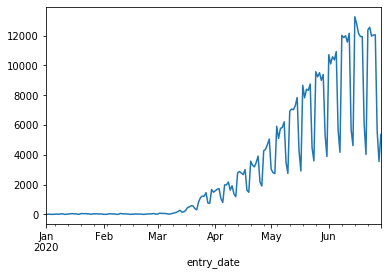

In [11]:
df.groupby(df.entry_date)['outpatient'].count().plot()
# plot shows increasing amount of cases in the dataset over time
# there are dips, probably for analysis with something like prophet

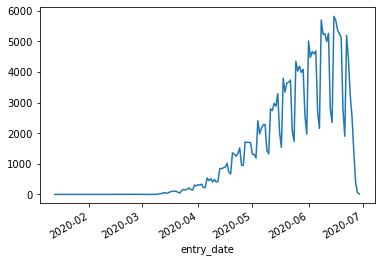

In [26]:
df.query('covid_res=="1"').groupby('entry_date')['covid_res'].count().plot()
# here we see a timeline similar to above where there is an increasing amount of people testing positive

### Preprocessing

In [12]:
pd.value_counts(df['pregnancy'])

97    287112
2     273840
1       4063
98      1587
Name: pregnancy, dtype: int64

In [13]:
# Check if there are any duplicates
df.duplicated().unique()

array([False])

In [14]:
df.sex.value_counts()

2    287112
1    279490
Name: sex, dtype: int64

In [15]:
# Check if there are males who are pregnant. Just making sure as one kaggler wrote that there is discrepancy but none found
df.query('sex == 2 & pregnancy ==1')

,id,sex,outpatient,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu


In [16]:
# Another way of doing above
df.loc[(df.sex == 2)& (df.pregnancy==1)]

,id,sex,outpatient,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu


In [17]:
# Mexico rate of birth is 18 per 1000 in 2018
# replace all 97's and 98's with 2 or not pregnant
df.pregnancy = df.pregnancy.replace([97,98],2)

In [18]:
df.pregnancy.value_counts()

2    562539
1      4063
Name: pregnancy, dtype: int64

In [19]:
df = df.rename(columns = {'patient_type':'outpatient'})

In [20]:
df.head()

,id,sex,outpatient,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-05-04,2020-05-02,9999-99-99,97,2,27,2,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,2020-03-19,2020-03-17,9999-99-99,97,2,24,2,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,2020-04-06,2020-04-01,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,2020-04-17,2020-04-10,9999-99-99,2,1,30,2,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,2020-04-13,2020-04-13,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [21]:
df['date_died'].value_counts()

9999-99-99    530426
08-06-2020       701
16-06-2020       699
10-06-2020       691
12-06-2020       674
               ...  
11-02-2020         1
08-02-2020         1
11-03-2020         1
26-02-2020         1
09-02-2020         1
Name: date_died, Length: 124, dtype: int64

In [22]:
df.intubed.value_counts()

97    444689
2     111824
1       9965
99       124
Name: intubed, dtype: int64

In [23]:
# Intubation is an invasive procedure and is only a percentage of covid patients who are hoispitalized
# I will have to looa at this again
df.intubed = df.intubed.replace([97,99],2)
df.intubed.value_counts()

2    556637
1      9965
Name: intubed, dtype: int64